In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Added all Libraries
from spectral import *
import numpy as np
import PIL
import matplotlib
import matplotlib.pyplot as plt
import mpmath as mp

In [3]:
#image stored in arr
img = open_image('f090819t01p00r06rdn_b_sc01_ort_img.hdr')
print img
arr = img.load()
block = []
for i in range(224):
    data = arr[2500:2510,450:460,i].astype(np.float32)
    block.append(data)
print "process complete"
varblock = []
for hg in range(224):
    yog = np.var(block[hg])
    varblock.append(yog)
variance = np.average(varblock)
##### considering 40x40 matrix
block = []
for i in range(224):
    data = arr[2500:2540,450:490,i].astype(np.float32)
    block.append(data)
print "process complete"

	Data Source:   '././f090819t01p00r06rdn_b_sc01_ort_img'
	# Rows:           6955
	# Samples:         781
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16
process complete
process complete


In [4]:
#correlation
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)
print "process complete"

process complete


In [5]:
#Pre-Processing of the hyperspectral image, Hawaii. Using GOA technique
haha = corr.index(min(corr))
print haha

157


In [6]:
#greedy ordering algorithm
rblock = [] #reference block
block1 = [] #all blocks
block1 = block
rindex = [] #contains all index
ifin = []
ifin1 = []


rindex.append(haha)
rblock.append(block1[haha])

for gh in range(len(block)):
        ifin.append(gh) #ifin will conatin the number od indices
        
for jk in range(224): 
    corgoa = [] #conatins correlation of greedy ordering algorithm
    Ref = rindex[jk] #Ref will contain the last rindex    
    block1.pop(Ref) #Removes that index from the block
    yoyo = ifin.pop(Ref) # saves it to a temp variable yoyo
    ifin1.append(yoyo) #ifin1 will conatin the final rearranged indexes
    for ijk in range(len(block1)):
        corr2 = np.corrcoef(rblock[jk].reshape(-1), block1[ijk].reshape(-1))[0][1] #calculate correlation coefficient with respect to the reference block
        corgoa.append(corr2)
    if len(corgoa) !=0:
        indexi = corgoa.index(max(corgoa)) #indexi will contain the index of maximum correlation w.r.t to the rblock
        rblock.append(block1[indexi]) #add the corresponding block to the rblock
        rindex.append(indexi) 
    del(corgoa)
    del(Ref)
print "Process Complete"

Process Complete


In [7]:
corrfin = []
for i in range(223):
    corfin = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrfin.append(corfin)
print "process complete"

process complete


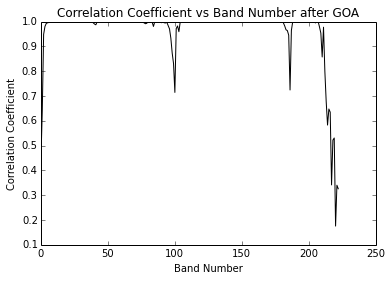

In [8]:
plt.figure(12)
plt.plot(range(0,223),corrfin, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after GOA')
plt.show()

In [9]:
#normalizing each block
rblockn = []
maxblock = []
minblock = []
for q in range(len(rblock)):
    xc = rblock[q]
    maxxc = np.max(xc)
    maxblock.append(maxxc)
    minxc = np.min(xc)
    minblock.append(minxc)
    xcfin = []
    for xci in range(len(xc)):
        for xcj in range(len(xc)):
            xcres = (xc[xci][xcj] - minxc)/(maxxc - minxc) 
            xcfin.append(xcres)
    xcfin1 = np.reshape(xcfin,(40,-1))
    rblockn.append(xcfin1)
print 'Process Complete'

Process Complete


In [10]:
def raster(arr):
    a = arr
    xx = []
    for i in range(10):
        zz = []
        for j in range(10):
            x = float(a[i][j])
            zz.append(x)
        xx.extend(zz)
        del zz
    return xx

In [11]:
#imagescanning
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:10,:10]
    yy = raster(xx)
    finlist = finlist + yy

In [12]:
len(finlist)

22400

In [13]:
finlist = list(finlist)

In [14]:
float(finlist[0])

0.5555555820465088

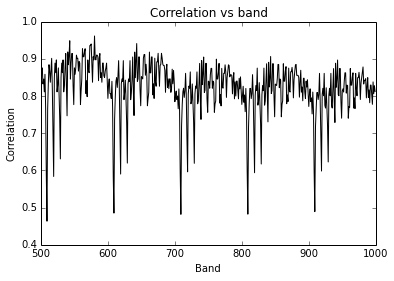

In [15]:
plt.figure(29)
plt.plot(range(500,1000),finlist[500:1000], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [16]:
from audiolazy import lpc

In [17]:
y = 40 #frame size

In [18]:
finli = map (lambda x: finlist[y*x:(x+1)*y], range (len(finlist)/y)) 

In [19]:
reslpcfin = []
errorframe = []
coefficient = []
lpcfunction = []
lpcerror = []
errorfull = []
for ijk in range(len(finlist)/y):
    lpcframe = lpc(finli[ijk],order=3)
    lpcfunction.append(lpcframe)
    lpcerror.append(lpcframe.error)
    reslpc = list(lpcframe(finli[ijk]))
    reslpcfin.append(reslpc)
    coefficient.append(lpcframe.numerator)
    errorfr = []
    for ijkl in range(len(reslpc)):
        err = finli[ijk][ijkl] - reslpc[ijkl]
        errorfr.append(err)
        errorfull.append(err)
    errorframe.append(errorfr)
    del(errorfr)
    del(reslpc)
    del(lpcframe)
print "process complete"

process complete


In [20]:
from __future__ import with_statement
from __future__ import unicode_literals

import numpy as np
import scipy.cluster
from pylab import *

class codebook(object):

    def __init__(self, input):
        self.__vector = []
        for i in input:
            self.vector.append(np.array(i))
        self.__centroid = 0.0

    def __str__(self):
        return "centroid:" + str(self.__centroid) + " vector_count:" + str(len(self.__vector))

    #The center of the calculation
    @property
    def centroid(self):
        return self.__centroid

    def _get_vector(self):
        return self.__vector

    def _set_vector(self, value):
        self.__vector.append(value)

    def _del_vector(self):
        self.__vector = []

    vector = property(_get_vector, _set_vector, _del_vector)

    def calc_centroid(self, eps = 0.0):
        if len(self.__vector) < 1:
            return False

        c = np.zeros([len(self.__vector[0])])
        for i in self.__vector:
            c += i
        self.__centroid = (c / len(self.__vector))* (1.0 + eps)

        return True



class LBG_splitting(object):
    """LBG+Splitting Algorithm"""

    #Calculation of distortion ( metrics / convergence determination)
    def calc_D(self):
        result = 0.0
        a = []
        for code in self.__codebook:
            center = code.centroid
            for child in code.vector:
                result += np.linalg.norm(center - child)
                a.append(np.linalg.norm(center - child))
        return result , a

    def start(self, N, input1, eps = np.float64(0.00001)):
        delta = np.float64(0.01)
        eps = np.float64(eps)
        #Creating the initial code book / initialization
        self.__codebook = []
        N /= 2
        d = int(len(input1)/N)
        for i in range(N):
            tmp = input1[i*d:(i+1)*d]


            #You want to create a minute of the code book of + delta and -delta
            code = codebook(tmp)
            code.calc_centroid(delta)
            self.__codebook.append(code)

            code = codebook(tmp)
            code.calc_centroid(-1*delta)
            self.__codebook.append(code)

            
        #Strain calculation
        global D
        distort = self.calc_D()
        D = distort[0]
        global distortion
        distortion = []
        distortion.append(distort[1])
        cnt = 0
        
        print "distortion = ", D
        
        #Clustering
        while True:
            #For now , delete the previous results
            for i in self.__codebook:
                del(i.vector)

            #Clustering part
            global position
            position = []
            for vector in input1:
                d = np.finfo(np.float64).max
                pos = -1
                for i in range(len(self.__codebook)):
                    code = self.__codebook[i]
                    tmp = np.linalg.norm(vector - code.centroid)
                    if d >= tmp:
                        d = tmp
                        pos = i
                position.append(pos)
                self.__codebook[pos].vector = vector

            #Recalculation of the median
            temp_codebook = []
            for i in self.__codebook:
                if i.calc_centroid():
                    temp_codebook.append(i)

            self.__codebook = temp_codebook


            #Calculation of metrics
            distort = self.calc_D()
            tmp_D = distort[0]
            distortion.append(distort[1])
            
            if (D - tmp_D) / D <= eps:
                break

            D = tmp_D
            print "distortion = ", D

    @property
    def codebook(self):
        return self.__codebook

In [21]:
N = 256    #The number of Clusters
data = np.array(errorframe)       #Input Data

clustering = LBG_splitting()

clustering.start(N, data)

distortion =  293.601740033
distortion =  75.9288151689
distortion =  51.5793757926
distortion =  46.5713555864
distortion =  45.7571683668
distortion =  45.2355528549
distortion =  45.1257138604
distortion =  44.8149800355


In [22]:
np.sum(distortion[0])
dist = D

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


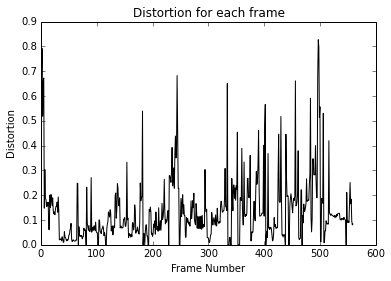

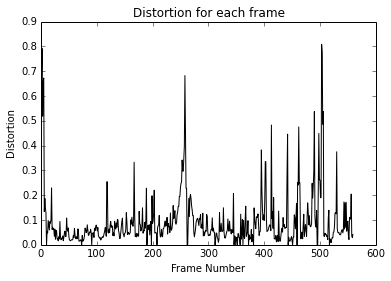

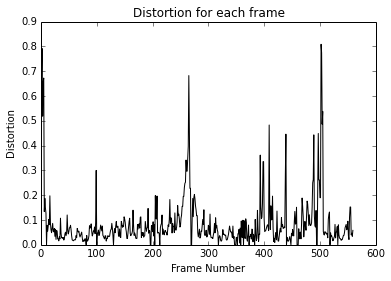

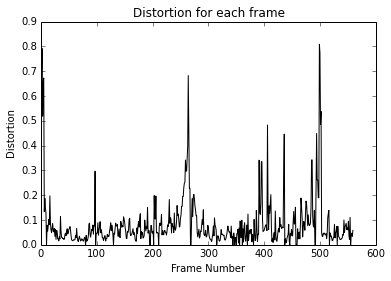

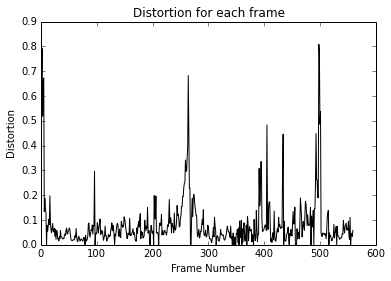

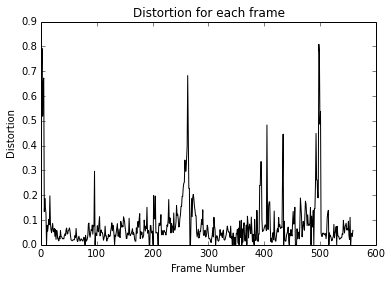

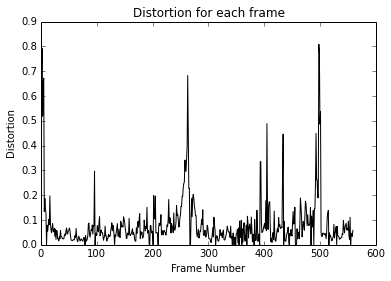

In [23]:
#plot of distortion

for i in range(1,len(distortion)-1):
    plt.figure(12+i)
    plt.plot(range(len(finlist)/y),distortion[i], 'k')
    plt.xlabel('Frame Number')
    plt.ylabel('Distortion')
    plt.title('Distortion for each frame')
    plt.show()

In [24]:
for i in range(len(clustering.codebook)):
    codebook = clustering.codebook[i]
    print "Cluster%d" % (i)
    print "\tcentroid:%s" % (codebook.centroid)
    print "\tvectors:"
    for j in codebook.vector:
        print "\t\t%s" % (j)

Cluster0
	centroid:[ 0.          0.43569377  0.55667962  0.68025936  0.67040832  0.64167989
  0.56729503  0.46241248  0.50099197  0.45887401  0.57360759  0.63637218
  0.49467939  0.5027612   0.53148965  0.46064324  0.57360759  0.49114092
  0.57537683  0.63637218  0.56729503  0.66210545  0.82572675  0.82276154
  0.85567694  0.6062416   0.59549106  0.6372568   0.5309872   0.53704853
  0.6130566   0.69304543  0.66411083  0.58677583  0.61571046  0.58412198
  0.34340185  0.40865935  0.63933735  0.4980718 ]
	vectors:
		[ 0.          0.43569377  0.55667962  0.68025936  0.67040832  0.64167989
  0.56729503  0.46241248  0.50099197  0.45887401  0.57360759  0.63637218
  0.49467939  0.5027612   0.53148965  0.46064324  0.57360759  0.49114092
  0.57537683  0.63637218  0.56729503  0.66210545  0.82572675  0.82276154
  0.85567694  0.6062416   0.59549106  0.6372568   0.5309872   0.53704853
  0.6130566   0.69304543  0.66411083  0.58677583  0.61571046  0.58412198
  0.34340185  0.40865935  0.63933735  0.498

In [25]:
a = 0
for i in range(len(clustering.codebook)):
    a = len(clustering.codebook[i].vector) + a
print a

560


In [26]:
len(position)

560

In [27]:
clustering.codebook[position[2]].centroid

array([ 0.        ,  0.43569377,  0.55667962,  0.68025936,  0.67040832,
        0.64167989,  0.56729503,  0.46241248,  0.50099197,  0.45887401,
        0.57360759,  0.63637218,  0.49467939,  0.5027612 ,  0.53148965,
        0.46064324,  0.57360759,  0.49114092,  0.57537683,  0.63637218,
        0.56729503,  0.66210545,  0.82572675,  0.82276154,  0.85567694,
        0.6062416 ,  0.59549106,  0.6372568 ,  0.5309872 ,  0.53704853,
        0.6130566 ,  0.69304543,  0.66411083,  0.58677583,  0.61571046,
        0.58412198,  0.34340185,  0.40865935,  0.63933735,  0.4980718 ])

In [28]:
errorframe[2]

[0.0,
 0.4356937684166858,
 0.556679615550021,
 0.6802593640814744,
 0.6704083241389088,
 0.6416798865703905,
 0.5672950294941183,
 0.4624124798731315,
 0.5009919682065841,
 0.4588740084002504,
 0.5736075897836889,
 0.6363721795983419,
 0.4946793884399848,
 0.5027612037057517,
 0.5314896494543838,
 0.46064324437396387,
 0.5736075897836889,
 0.4911409169671037,
 0.5753768252828564,
 0.6363721795983419,
 0.5672950294941183,
 0.662105448948684,
 0.8257267509568655,
 0.822761538949704,
 0.8556769436642432,
 0.6062416006054926,
 0.5954910596766831,
 0.6372567973479257,
 0.5309871992285372,
 0.5370485341679117,
 0.6130566029407959,
 0.6930454301793426,
 0.6641108281690331,
 0.5867758320599542,
 0.6157104566640932,
 0.5841219783366569,
 0.3434018465344074,
 0.40865935178465274,
 0.6393373521769,
 0.49807179668170715]

In [29]:
huffcodebook = position

In [30]:
from heapq import heappush, heappop, heapify
from collections import defaultdict
 
def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
 
txt = "this is an example for huffman encoding"
symb2freq = defaultdict(int)
for ch in huffcodebook:
    symb2freq[ch] += 1
# in Python 3.1+:
# symb2freq = collections.Counter(txt)
huff = encode(symb2freq)
print "Symbol\tWeight\tHuffman Code"
huffsymbol = []
hufffreq = []
for p in huff:
    huffsymbol.append(p[1])
    hufffreq.append(symb2freq[p[0]])
    #print "%s\t%s\t%s" % (p[0], symb2freq[p[0]], p[1])

Symbol	Weight	Huffman Code


In [31]:
lenhuff = []
for i in range(len(huffsymbol)):
    yo = huffsymbol[i]
    x = str(yo)
    ya = x.lstrip('0')
    lenhuff.append(len(ya)*hufffreq[i])
print sum(lenhuff)

3201


In [32]:
cr = float(len(finlist)*16)/sum(lenhuff)
print cr

111.965010934


In [33]:
#BPP
bpp = sum(lenhuff)/22400.00
print bpp

0.142901785714


In [34]:
sum(lenhuff)

3201

In [35]:
#huffcodebook - vector de-quantization
errordecode = []
for ik in position:
    abcde = list(clustering.codebook[ik].centroid)
    errordecode.append(abcde)

In [36]:
len(errordecode)

560

In [37]:
print coefficient[0]
print "---"
print lpcerror[0]
print "---"
print lpcfunction[0] #h
print "---"
print finli[0] #x
print "---"
print reslpcfin[0] #y
print "---"
print errordecode[0] #e

[1, -0.6269251537761988, -0.2212629565898565, -0.09078058486566887]
---
2.60258177955
---
1 - 0.626925 * z^-1 - 0.221263 * z^-2 - 0.0907806 * z^-3
---
[0.5555555820465088, 0.8888888955116272, 0.8888888955116272, 1.0, 0.4444444477558136, 0.5555555820465088, 0.6666666865348816, 0.6666666865348816, 0.5555555820465088, 0.5555555820465088, 0.4444444477558136, 0.4444444477558136, 1.0, 0.6666666865348816, 0.6666666865348816, 0.4444444477558136, 0.6666666865348816, 0.5555555820465088, 0.3333333432674408, 0.5555555820465088, 0.5555555820465088, 0.8888888955116272, 0.4444444477558136, 0.5555555820465088, 0.5555555820465088, 0.5555555820465088, 0.8888888955116272, 0.5555555820465088, 0.4444444477558136, 0.5555555820465088, 0.5555555820465088, 0.8888888955116272, 0.4444444477558136, 0.5555555820465088, 0.5555555820465088, 0.5555555820465088, 0.8888888955116272, 0.4444444477558136, 0.3333333432674408, 0.5555555820465088]
---
[0.5555555820465088, 0.5405971268060045, 0.2086982173695327, 0.19562134672

In [38]:
from scipy.signal import lfilter

In [39]:
estx = []

In [40]:
estx.append(reslpcfin[0][0]+errordecode[0][0])

In [41]:
estx

[0.55555558204650879]

In [42]:
esty = list(lpcfunction[0](estx))

In [43]:
esty

[0.55555558204650879]

In [44]:
len(lpcfunction)

560

In [45]:
estx = []
esty = []
for iq in range(len(errordecode)):
    estx1 = []
    esty1 = []
    for iw in range(len(errordecode[iq])):
        estx1.append(reslpcfin[iq][iw]+errordecode[iq][iw])
        esty1 = list(lpcfunction[iq](estx1))
    esty.append(esty1)
    estx.append(estx1)

In [46]:
print estx[0]
print finli[0]

[0.55555558204650879, 0.94746528084081461, 0.78050877992426693, 0.85127339608369401, 0.19060194444854894, 0.5622569363460751, 0.67215661573129815, 0.67119850313415441, 0.51533954511544811, 0.52012300028142311, 0.41773721372045275, 0.53460560125358059, 1.064109886614875, 0.48234729963343126, 0.57030731330807161, 0.36135889289371176, 0.63956905033097733, 0.46938562974564008, 0.40246227475678803, 0.76373802139536995, 0.65870872702748662, 0.90475666648984587, 0.26199299841288753, 0.62355137098937763, 0.63163044321624795, 0.60059124533162622, 0.81987587549565788, 0.35981356553936295, 0.33028188995341029, 0.59494765187683829, 0.61355833343425692, 0.88412325241158229, 0.24540113389607271, 0.55028282221155755, 0.48959990505798878, 0.47125107800881183, 0.83882449141185755, 0.21505215065510747, 0.35222982839711769, 0.63505837498654927]
[0.5555555820465088, 0.8888888955116272, 0.8888888955116272, 1.0, 0.4444444477558136, 0.5555555820465088, 0.6666666865348816, 0.6666666865348816, 0.55555558204650

In [47]:
print esty[0]
print reslpcfin[0]

[0.55555558204650879, 0.59917351213519188, 0.063595092402029388, 0.10188017923735501, -0.60179189292180946, 0.18355347099443681, 0.20021135291333508, 0.10809702536250761, -0.10521705329068153, -0.012486459246615268, -0.083298322288903576, 0.11084885616119472, 0.58930534668635681, -0.34098079919181368, -0.016068250491391801, -0.19950721468989616, 0.24304841855870463, -0.063304463970522709, -0.066124694014745522, 0.34950619323500604, 0.048241055695128376, 0.28627290314160814, -0.52030213859630137, 0.19931427165339097, 0.10060671929169281, 0.042853535031178933, 0.2469873391691049, -0.34441561948128296, -0.13122446971845381, 0.23384340240116575, 0.13482745189119918, 0.33784504026169782, -0.49864539877694675, 0.14511176943001786, 0.010054355739044951, 0.020273719576607223, 0.38510001788285031, -0.45954459516215618, -0.010973009732317296, 0.29050458304916321]
[0.5555555820465088, 0.5405971268060045, 0.2086982173695327, 0.1956213467270857, -0.45985274493628026, -0.025034632112865635, 0.129255

In [48]:
estxfin = []
for yi in estx:
    for yu in yi:
        estxfin.append(yu)

In [49]:
y = 100
estxfin1 = map (lambda x: estxfin[y*x:(x+1)*y], range (len(finlist)/y)) 

In [50]:
blockfin = []
for iji in estxfin1:
    bloc = np.reshape(iji,[10, 10])
    blockfin.append(bloc)

In [51]:
len(maxblock)

224

In [52]:
finblockfin = []
for i in range(len(blockfin)):
    eega = blockfin[i]
    eegamax = np.max(eega)
    eegamin = np.min(eega)
    oldmax = maxblock[i]
    oldmin = minblock[i]
    eegvalue = []
    for j in range(len(eega)):
        for k in range(len(eega)):
            ee = ((eega[j][k] - eegamin)*(oldmax - oldmin))/(eegamax - eegamin)
            eee = ee  + oldmin
            eegvalue.append(eee)
    fblock = np.reshape(eegvalue, [10,10])
    finblockfin.append(fblock)
print "Process Complete"

Process Complete


In [53]:
finblockfin[0]

array([[ 2.76022081,  6.79817755,  5.07797739,  5.80708529, -1.        ,
         2.82926676,  3.96159432,  3.95172261,  2.34586357,  2.39514887],
       [ 1.34023908,  2.54436721,  8.        ,  2.00593512,  2.91221208,
         0.75935726,  3.62583539,  1.87238736,  1.18285705,  4.90518351],
       [ 3.82303691,  6.35813859, -0.26443773,  3.4608007 ,  3.54404167,
         3.22423601,  5.48358773,  0.74343531,  0.43916208,  3.16608847],
       [ 3.3578396 ,  6.14554667, -0.43538841,  2.70589407,  2.08066077,
         1.8916076 ,  5.6788207 , -0.74808259,  0.66529792,  3.57936062],
       [ 5.04983923,  0.84675907,  3.38368778,  2.95023257,  5.03131792,
         4.78268513,  1.0927189 ,  3.09030012,  2.04199994,  4.75694621],
       [ 5.26828612,  1.41639121,  4.55199503, -0.7051713 ,  3.80665933,
         3.231581  ,  3.31169653,  7.28008342,  3.69796261,  0.51052674],
       [ 1.61947007,  2.33861879,  6.39666362,  3.16349887,  3.74653649,
        -0.21694176,  2.5321807 ,  2.89606203

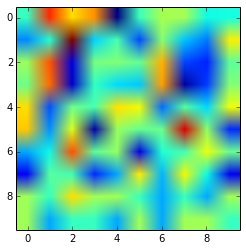

In [54]:
imshow(finblockfin[0])

In [55]:
rblock5 = []
for i in range(len(rblock)):
    a = rblock[i]
    ab = a[:10,:10]
    rblock5.append(ab)

In [56]:
aaa = []
for i in range(10):
    for j in range(10):
        aa = rblock[0][i][j][0]
        aaa.append(aa)

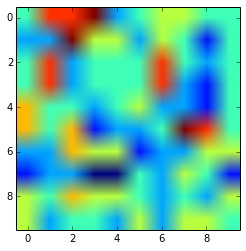

In [57]:
yoyo = np.reshape(aaa,(10,-1))
imshow(yoyo)

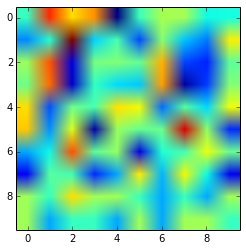

In [58]:
imshow(finblockfin[0])

In [59]:
psnr = []
mse = []
snr = []
snrr = []
for i in range(224):
    aq = rblock5[i]
    aw = finblockfin[i]
    subtr = []
    squ = []
    for j in range(10):
        for k in range(10):
            sub = (aq[j][k] - aw[j][k])**2
            subtr.append(sub)
            squ1 = aq[j][k]**2
            squ.append(squ1)
    mse1 = np.sum(subtr)/100.0
    mse.append(mse1)
    psnr1 = 10*np.log10(65536**2/mse1)
    p = 0.01*sum(squ)
    snr1 = 10*log10(p/mse1)
    snrr.append(20*np.log10(100.0/(mse1**0.5)))
    snr.append(snr1)
    psnr.append(psnr1)
print "process complete"

process complete


In [60]:
psnr1 = np.average(psnr)

In [61]:
sdr = 10*np.log10(variance**2/dist)

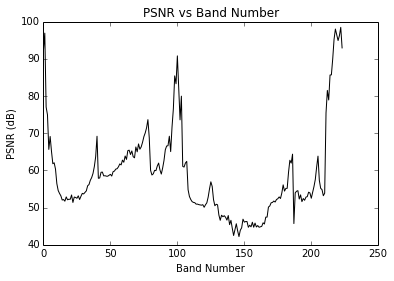

In [62]:
plt.figure(80)
plt.plot(range(224),psnr, 'k')
plt.xlabel('Band Number')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Band Number')
plt.show()

In [63]:
print 'cr = ', cr
print 'bpp= ', bpp
print 'sdr= ', sdr
print 'psnr= ', psnr1
print 'dist= ',dist

cr =  111.965010934
bpp=  0.142901785714
sdr=  58.4903270986
psnr=  58.7991714914
dist=  44.8149800355
